## Huff, Puff & Classify
### Example Notebook: Fuzzy String Classification

#### User Globals

##### User should only modify basic settings unless they have received advanced training on this module from developers. 

Basic settings can be used in order to select which variable the user wants to predict values for and which survey types to analyze. 

The default setting will be "housing_roof", which means that the user can provide a dataset with string values for housing roof and then predict the quality ranking as "housing_roof_rank" for these values. The user can change this value to "housing_wall" or "housing_floor" in order to predict quality of those levels.

The default survey filter setting is MACRO DHS surveys, which are the gold standard for this data and easiest to work with.


#### Basic Settings

In [1]:
#which variable do you want to analyze the strings in order to classify quality (currently: floor/wall/roof)
DEP_VAR = "housing_roof"

#setup a filter to select which surveys you want to work with
SVY_FILTER = ['MACRO_DHS']

#### Advanced Settings

Please exercise caution editing the below cell without advanced training. This cell provides the ability for the user to change more advanced options, including options that pertain to the column naming structure of the input data (which should be unmodified if using the example data) and analytical options pertaining to the type of cross-validation being done. In the interest of time for a basic example, the cross-validation provided here will only use 2 folds.

Below the user can also modify the types of garbage code values that will be cleaned from the dataset. These values do not have a meaningful relationship with quality and so will not be used in the analysis.

In [2]:
#script options
WRITE_FILES = False #do you want to write output csvs of results?

#setup lists of vars to work with
STR_VARS = ['housing_roof', 'housing_wall', 'housing_floor']
NUM_VARS = [s + '_num' for s in STR_VARS]
RANK_VARS = [s + '_rank' for s in STR_VARS]

#which variable do you want to predict (currently: floor/wall/roof)
#note that this rank variable inherits from the user defined dependent (string) var
#changes here should only be done if the column names have been modified
PRED_VAR = DEP_VAR + "_rank" #will always be using the strings to predict ranking

#analytical options
CV_SAMPLE_PCT = .2 #hold out x% for testing
CV_SAMPLE_WT = "N" #which variable(if any) shall weight your test sample
CV_FOLDS = 2 #use a x-fold cross-validation env

#garbage lists
STR_GARBAGE = ['nan', 'other', 'not a dejure resident', 'not dejure resident']
RANK_GARBAGE = ['4', '5', '6', '7', '8', '9', 'n']

#dictionaries
PRED_DICT = {'natural':'1', 'rudimentary':'2', 'finished':'3'} #map categories back to ranks

#### Package imports and setup

In [3]:
#import packages
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import seaborn as sns
import sys

#import custom modules
sys.path.append('../hp_classify')
import prep.prep_data as prep
import prep.prep_cv as cv
import model.fuzzy as fz
import model.cv as fzcv

#magik
%matplotlib inline

In [4]:
#setup directories
CWD = os.getcwd()
HOME_DIR = os.path.abspath(os.path.join(CWD, os.pardir))
DATA_DIR = HOME_DIR + "/data"
DATA_FILENAME = "example_data.csv"
RESULTS_DIR = HOME_DIR + "/results"

#### Read in and prep the data

In [6]:
#read in data and clean the text, then subset to our gold standard MACRO DHS data
df = prep.read_then_clean(DATA_DIR + "/" + DATA_FILENAME, STR_VARS, SVY_FILTER)

#remove garbage codes from our string variables
df_clean = prep.remove_garbage_codes(df, STR_VARS, STR_GARBAGE)

#extract ranking values for roof/wall/floor, then remove non-informative values
#note that we only want to use ranks from 1-3, as these correspond to our final output ranks
df_clean = prep.extract_ranking(df_clean, NUM_VARS)
df_clean = prep.remove_garbage_codes(df_clean, RANK_VARS, RANK_GARBAGE)

~begin reading
data read!
~begin cleaning
data clean!
~applying filter
{'nan': nan, 'other': nan, 'not a dejure resident': nan, 'not dejure resident': nan}
removing garbage from  housing_roof
removing garbage from  housing_wall
removing garbage from  housing_floor
defining ranking for  housing_roof_num
defining ranking for  housing_wall_num
defining ranking for  housing_floor_num
{'4': nan, '5': nan, '6': nan, '7': nan, '8': nan, '9': nan, 'n': nan}
removing garbage from  housing_roof_rank
removing garbage from  housing_wall_rank
removing garbage from  housing_floor_rank


#### Run a bifold cross validation exercise for "housing roof"
##### Since this is an example, we will only work on 25 unknown words from each cross-validation

In [7]:
#setup training/test data for a bifold cross validation, using the 'housing roof" variable to predict 
train_list = cv.cv_censor_col(df_clean, PRED_VAR, CV_SAMPLE_PCT, CV_SAMPLE_WT, CV_FOLDS)

#run bifold cross validation for "housing roof"
#run your cross-validation analysis
cv_distrib, cv_preds, cv_results, cv_df = fzcv.fuzzy_cv(train_list, DEP_VAR, PRED_DICT,
                                                        subset=range(25), #only run on 25 words from each CV for speed
                                                        jupyter=True) #display jupyter progress bar

#output the results to csv
if WRITE_FILES == True:
    save_results_df(cv_results, out_dir, "ex_cv_results")
    save_results_df(cv_preds, out_dir, "ex_cv_preds")
    save_results_df(cv_df, out_dir, "ex_cv_df")
    save_results_df(cv_distrib, out_dir, "ex_cv_distrib")

sampling df, iteration # 0
sampling df, iteration # 1


working on cv loop # 0
building corpus for rank # 1
building corpus for rank # 2
building corpus for rank # 3
extracting unknown strings
need to classify 94 unknown strings


analyzing... cement bricks
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... sod mud with grass
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... wood planks
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... wood timber
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... ceramic tiles
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... metal
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... roofing shingles
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... rustic mat mud with hay
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... cardboard cloth tent
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... thatch bushes grass
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... cement
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... mud and hay
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... rustic mat
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... calamine cement fiber
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... wood
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... grass palm
~>corpus# 0
~>corpus# 1
~

analyzing... metal
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... sod mud with grass
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... wood timber
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... cement bricks
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... roofing shingles
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... rustic mat mud with hay
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... wood planks
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... cardboard cloth tent
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... thatch bushes grass
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... ceramic tiles
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... cement
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... mud and hay
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... calamine cement fiber
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... rustic mat
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... wood
~>corpus# 0
~>corpus# 1
~>corpus# 2
analyzing... zinc plates
~>corpus# 0
~>corpus# 1


#### Results

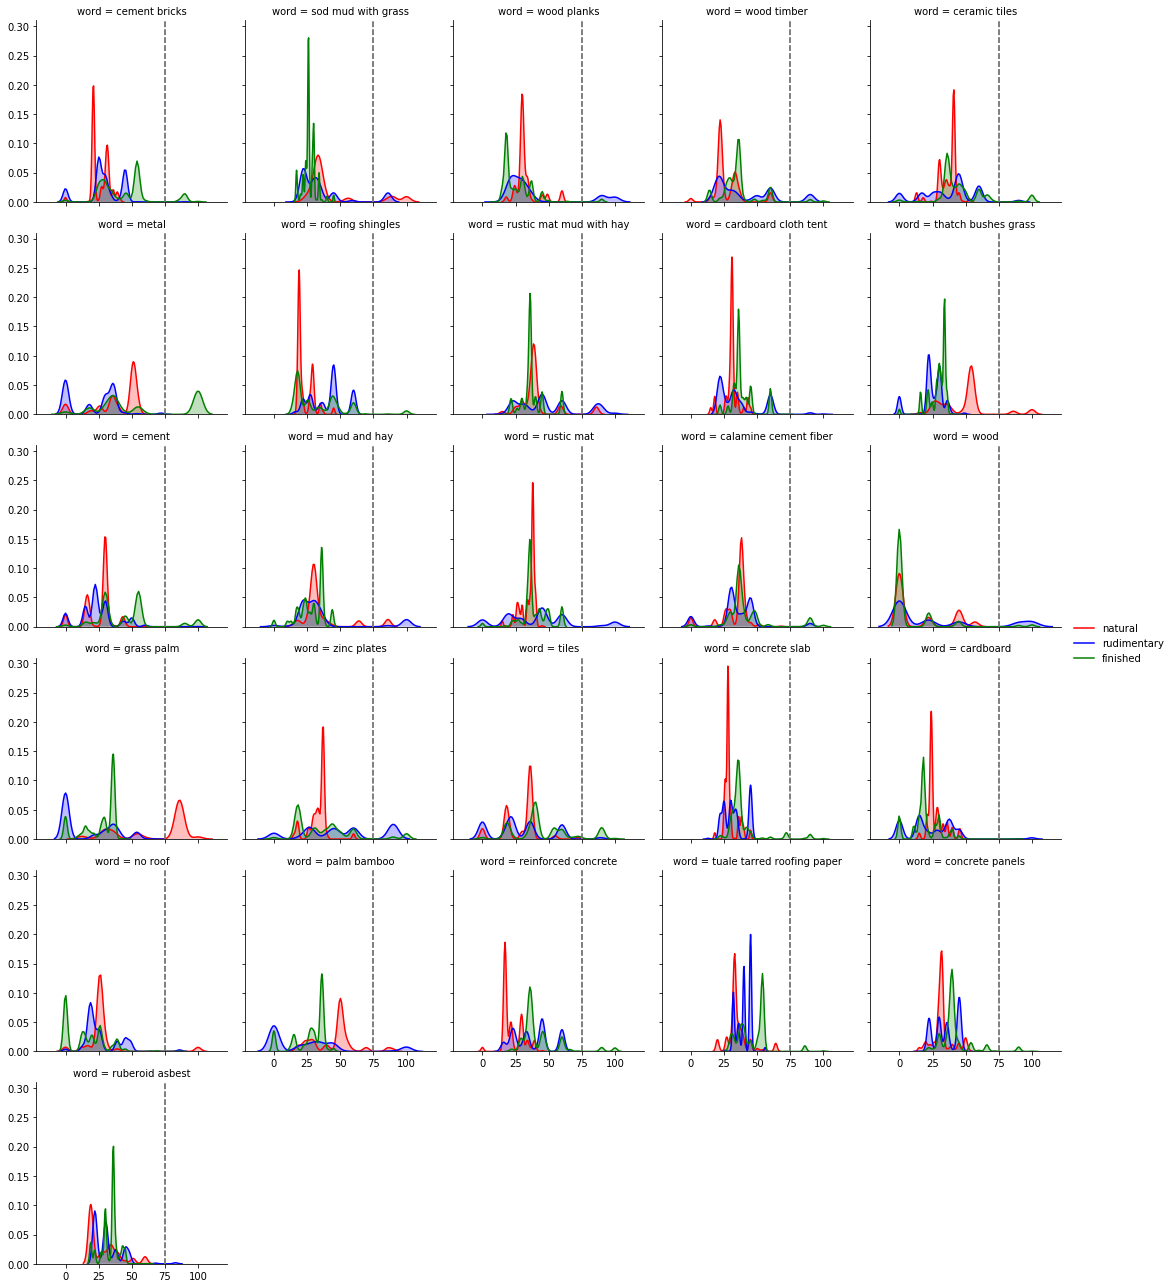

In [8]:
#plot results
fz.fuzzy_density(pd.concat(cv_distrib), 'word', 
                 ['natural', 'rudimentary', 'finished'],
                 color_list={'natural':'r', 'rudimentary':'b', 'finished':'g'},
                 cutoff=75)

In [39]:
#loop over cross validation runs in order to provide the accuracy percentages
for x in range(len(cv_results)):
    print("cv #", x, 'results:')
    
    subset_df = cv_results[x]
    
    display(subset_df)   
    print("computing a success percentage of...",
          round(subset_df['count'][1] / subset_df['count'].sum(), 3)*100,
          "%")

cv # 0 results:


col_0,count
success,
0,103
1,6570


computing a success percentage of... 98.5 %
cv # 1 results:


col_0,count
success,
0,152
1,6636


computing a success percentage of... 97.8 %
